# Explore here

In [1]:
import pandas as pd
raw_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv")
raw_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [2]:
raw_data.to_csv("https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv", index=False)

In [3]:
raw_data.shape

(1338, 7)

In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


THERE IS NO NULL DATA
CONTINUE TO CLEAN

In [5]:
raw_data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1333    False
1334    False
1335    False
1336    False
1337    False
Length: 1338, dtype: bool

In [6]:
raw_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
raw_data.count()

age         1338
sex         1338
bmi         1338
children    1338
smoker      1338
region      1338
charges     1338
dtype: int64

In [8]:
#sex,smoker,region convert to binary - factorise the non-numerical columns
from sklearn.preprocessing import MinMaxScaler

raw_data["sex_n"] = pd.factorize(raw_data["sex"])[0]
raw_data["smoker_n"] = pd.factorize(raw_data["smoker"])[0]
raw_data["region_n"] = pd.factorize(raw_data["region"])[0]


In [9]:
raw_data.head()

,age,sex,bmi,children,smoker,region,charges,sex_n,smoker_n,region_n
0,19,female,27.900,0,yes,southwest,16884.92400,0,0,0
1,18,male,33.770,1,no,southeast,1725.55230,1,1,1
2,28,male,33.000,3,no,southeast,4449.46200,1,1,1
3,33,male,22.705,0,no,northwest,21984.47061,1,1,2
4,32,male,28.880,0,no,northwest,3866.85520,1,1,2


ANALYSIS

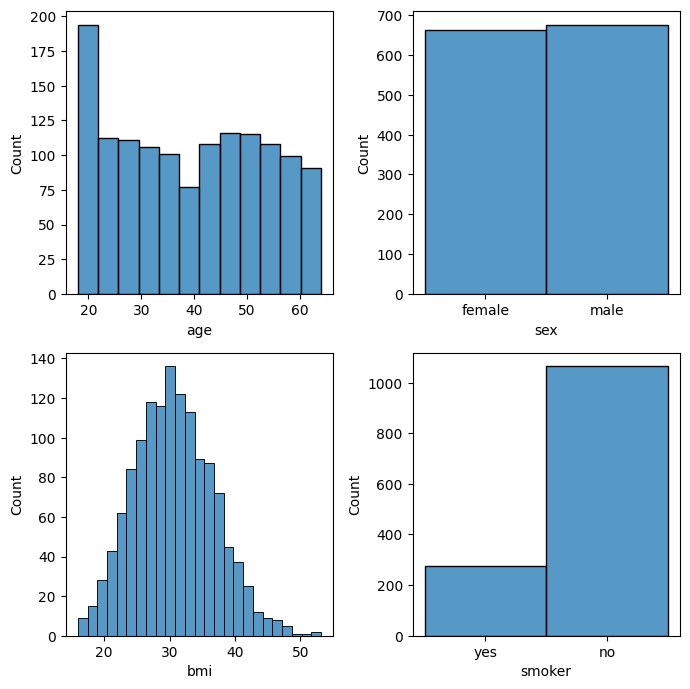

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis=plt.subplots(2,2, figsize=(7,7))
sns.histplot(ax= axis[0,0], data=raw_data, x="age")
sns.histplot(ax=axis[0,1], data=raw_data, x="sex")
sns.histplot(ax=axis[1,0], data=raw_data, x="bmi")
sns.histplot(ax=axis[1,1], data=raw_data, x="smoker")
plt.tight_layout()




Text(0, 0.5, 'Charges')

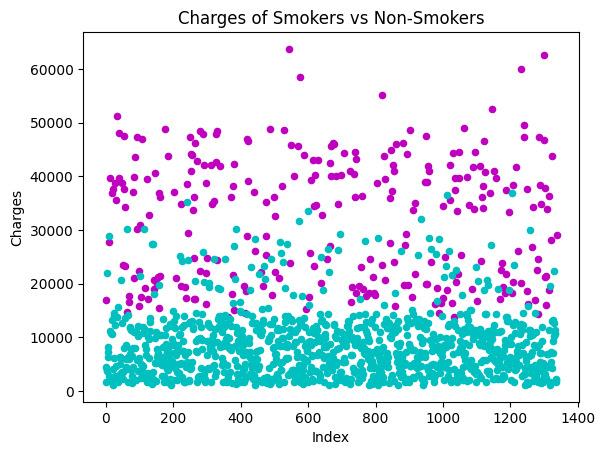

In [40]:
smokers = raw_data[raw_data['smoker'] == 'yes']
non_smokers = raw_data[raw_data['smoker'] == 'no']

plt.scatter(smokers.index, smokers['charges'], color='m', label='Smokers', s=20)
plt.scatter(non_smokers.index, non_smokers['charges'], color='c', label='Non-Smokers', s=20)

plt.title('Charges of Smokers vs Non-Smokers')
plt.xlabel('Index')
plt.ylabel('Charges')

Text(0, 0.5, 'Charges')

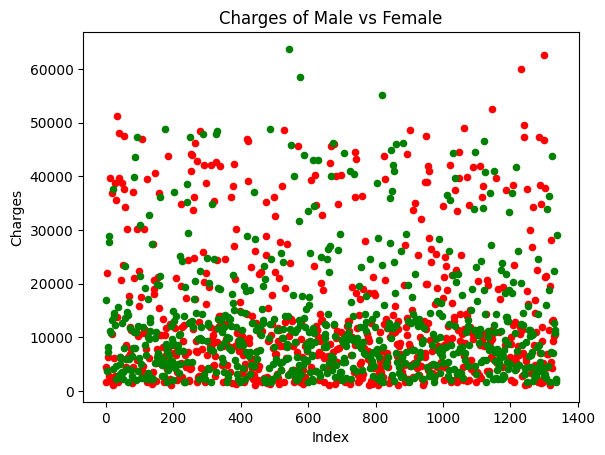

In [38]:
smokers = raw_data[raw_data['sex'] == 'male']
non_smokers = raw_data[raw_data['sex'] == 'female']

plt.scatter(smokers.index, smokers['charges'], color='r', label='Male', s=20)
plt.scatter(non_smokers.index, non_smokers['charges'], color='g', label='Female', s=20)

plt.title('Charges of Male vs Female')
plt.xlabel('Index')
plt.ylabel('Charges')

In [12]:
new_data = raw_data.drop(["sex", "smoker", "region"], axis=1)
new_data.head()

,age,bmi,children,charges,sex_n,smoker_n,region_n
0,19,27.900,0,16884.92400,0,0,0
1,18,33.770,1,1725.55230,1,1,1
2,28,33.000,3,4449.46200,1,1,1
3,33,22.705,0,21984.47061,1,1,2
4,32,28.880,0,3866.85520,1,1,2


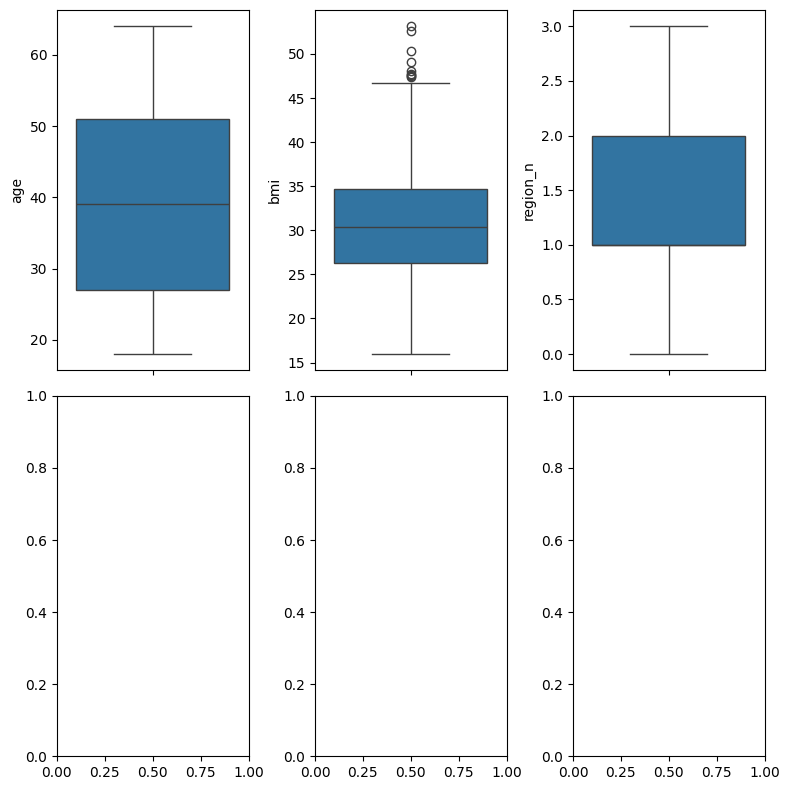

In [47]:
fig, axes = plt.subplots(2, 3, figsize = (8, 8))

sns.boxplot(ax = axes[0, 0], data = new_data, y = "age")
sns.boxplot(ax = axes[0, 1], data = new_data, y = "bmi")
sns.boxplot(ax = axes[0, 2], data = new_data, y = "region_n")

plt.tight_layout()

plt.show()

In [14]:
from sklearn.model_selection import train_test_split

X=new_data.drop("charges", axis=1)
Y=new_data["charges"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)


In [15]:
train_test_split(X_train, Y_train, test_size=0.2, random_state=0)
len(train_test_split(X_train, Y_train, test_size=0.2, random_state=0))

4

In [16]:
print(X_train.shape)
print(Y_train.shape)

(1070, 6)
(1070,)


In [17]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [18]:
print(f"Intercept (a): {model.intercept_}")
print(f"Coefficients (b): {model.coef_}")

Intercept (a): 11041.369857357367
Coefficients (b): [   253.99185244    328.40261701    443.72929547    -24.32455098
 -23568.87948381    288.50857254]


In [19]:
Y_pred = model.predict(X_test)
Y_pred

array([ 1.10172305e+04,  9.78753017e+03,  3.79947821e+04,  1.61227784e+04,
        6.93075923e+03,  3.96902046e+03,  1.55178430e+03,  1.42832091e+04,
        8.95342886e+03,  7.43194558e+03,  4.54457668e+03,  1.02472753e+04,
        8.65710757e+03,  4.12619770e+03,  2.78113171e+04,  1.10395971e+04,
        1.12514458e+04,  6.03101003e+03,  8.17339252e+03,  2.70394424e+04,
        3.35778484e+04,  1.42670864e+04,  1.16850232e+04,  3.24069403e+04,
        4.41465153e+03,  9.14607182e+03,  1.12786921e+03,  1.00891473e+04,
        4.08782973e+03,  1.03569127e+04,  8.96224058e+03,  4.02452861e+04,
        1.54779185e+04,  1.36671353e+04,  2.47415217e+04,  5.13005676e+03,
        1.28428861e+04,  3.05264017e+04,  3.34289155e+04,  3.48813457e+03,
        4.00215674e+03,  4.27800724e+03,  3.04613664e+04,  3.93491672e+04,
        2.80033682e+04,  5.00299253e+03,  1.09312243e+04,  7.77848493e+03,
        3.60829639e+03,  1.05573586e+04,  5.62958594e+03,  3.37882569e+03,
        3.28476568e+04,  

In [49]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(Y_test, Y_pred)
print(mse)
r2 = r2_score(Y_pred, Y_test)
print(r2)


158648694.83248517
-476.1479001649876


In [21]:
X=new_data.drop(["charges", "age", "children", "bmi", "smoker_n"], axis=1)
Y=new_data["charges"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

model = LinearRegression()
model.fit(X_train,Y_train)

Y_pred = model.predict(X_test)
Y_pred

r2 = r2_score(Y_pred, Y_test)
print(r2)



-476.1479001649876
